In [151]:
from cpclasses import *

In [152]:
positions = np.array([[-1, 0], [1,0], [-1.5, 1.5]])
static_points = [True, True, False]
LJ = LennardJones()
cluster = AtomicCluster(LJ, pos = positions, static = static_points)

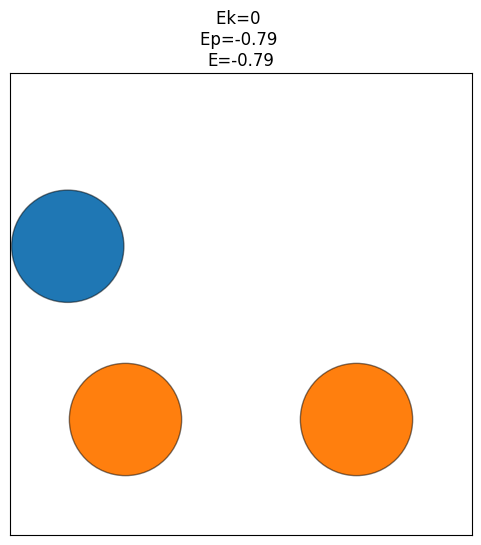

In [153]:
fig, ax = plt.subplots(figsize = (6,6))

ax.set(xlim = (-2, 2), ylim = (-1, 3), xticks = [], yticks = [])
ax.grid()
ax.set_aspect('equal')
cluster.draw(ax, radius=35)


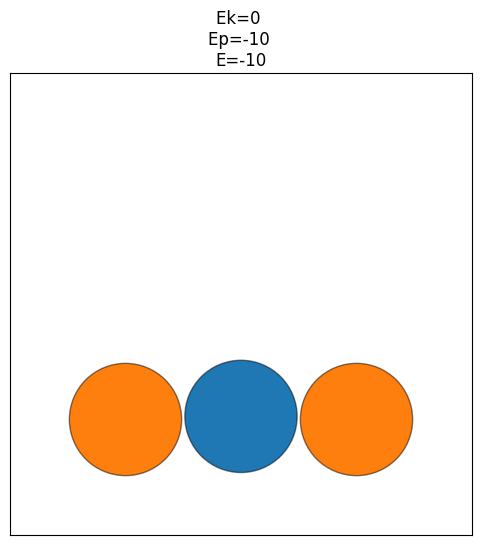

In [154]:
relax(cluster, 500, 0.01)

fig, ax = plt.subplots(figsize = (6,6))

ax.set(xlim = (-2, 2), ylim = (-1, 3), xticks = [], yticks = [])
ax.grid()
ax.set_aspect('equal')
cluster.draw(ax, radius=35)


In [155]:
static_points= np.array([[-1, 0], [1,0]])
x = np.linspace(-2,2,400)
y = np.linspace(-2,2,400)

Xs, Ys = np.meshgrid(x,y)

Zs = np.zeros_like(Xs)
for i in range(len(x)):
    for j in range(len(y)):
        Zs[i,j] = LJ.energy(np.array([[Xs[i,j], Ys[i,j]], static_points[0], static_points[1]]))
        if Zs[i,j] > 0:
            Zs[i,j] = 0



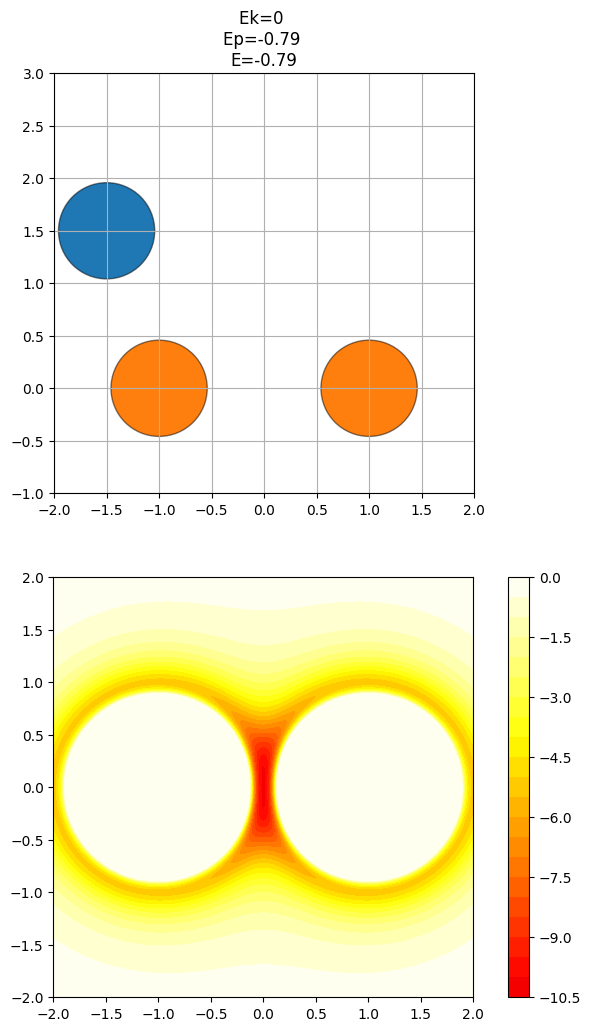

In [156]:
from matplotlib.animation import FuncAnimation

positions = np.array([[-1, 0], [1,0], [-1.5, 1.5]])
static_points = [True, True, False]
LJ = LennardJones()
cluster = AtomicCluster(LJ, pos = positions, static = static_points)

fig, ax = plt.subplots(2,1,  figsize = (9,12))

contour = ax[1].contourf(Xs, Ys, Zs, vmin = -15.75, vmax = 0, cmap = 'hot', levels = 20, extent=[-0.5, 0.5, -0.5, 0.5]) 
plt.colorbar(contour)

ax[0].set_aspect('equal')
ax[1].set_aspect('equal')

ax[0].set(xlim = (-2, 2), ylim = (-1, 3))
cluster.draw(ax[0], radius=33)

ax[0].grid(zorder =0)






In [157]:

def update(i):
    
    cluster.draw(ax[0], radius=33)
    pos = cluster.get_positions()[2]
    ax[1].plot(pos[0], pos[1], 'o', color = 'blue')
    relax(cluster, 1, 0.01)

ani = FuncAnimation(fig, update, frames=200, repeat = False)
save_animation(ani, 'line_search.gif', fps = 50)

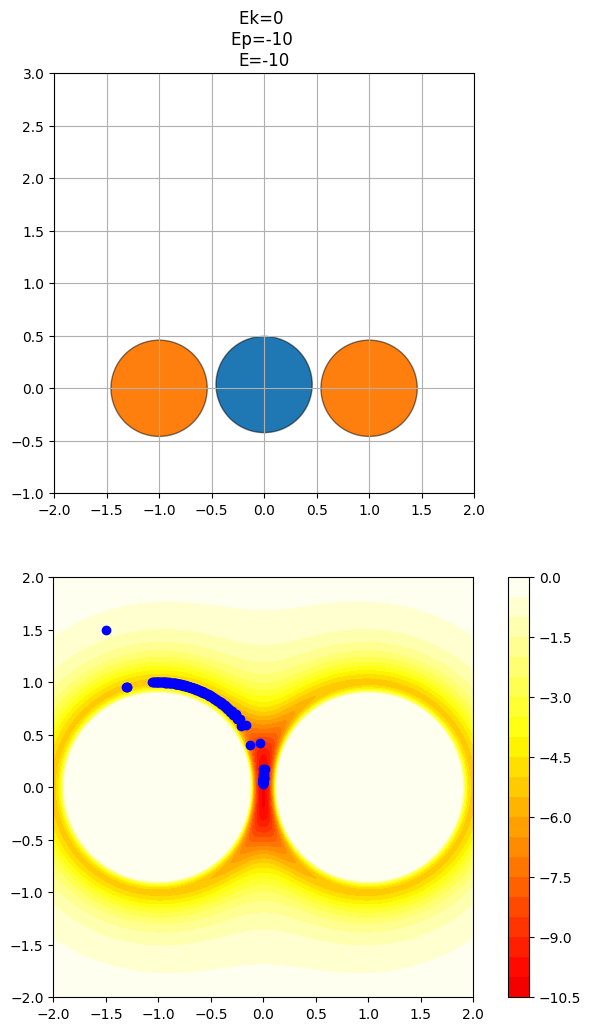

In [158]:
fig

In [161]:
static_points= np.array([[-0.5, -1], [0.5,-1]])
x = np.linspace(-2,2,400)
y = np.linspace(-2,2,400)

Xs, Ys = np.meshgrid(x,y)

Zs = np.zeros_like(Xs)
for i in range(len(x)):
    for j in range(len(y)):
        Zs[i,j] = LJ.energy(np.array([[Xs[i,j], Ys[i,j]], static_points[0], static_points[1]]))
        if Zs[i,j] > 0:
            Zs[i,j] = 0

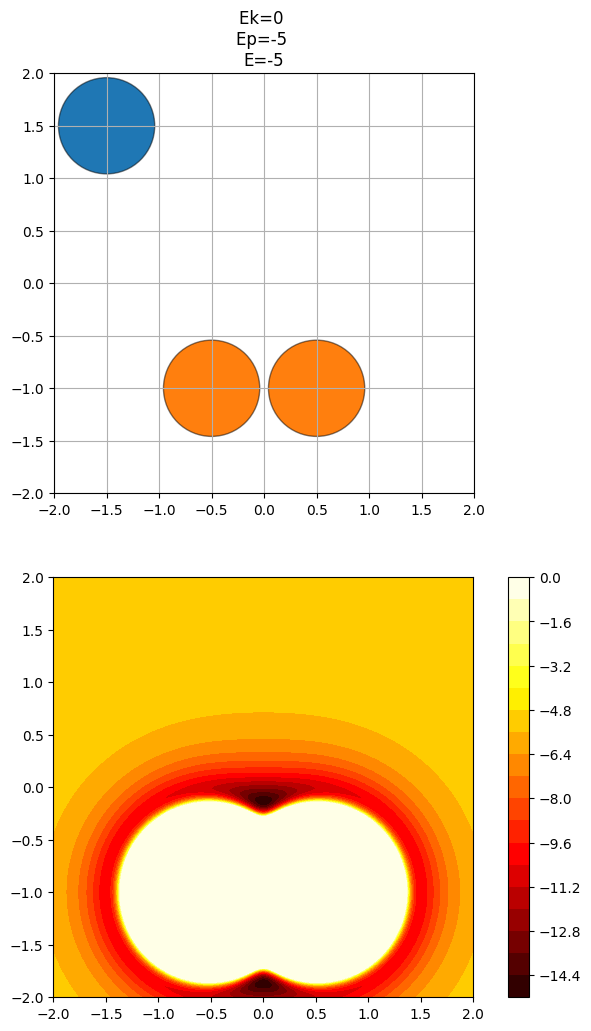

In [167]:
from matplotlib.animation import FuncAnimation

positions = np.array([[-0.5, -1], [0.5,-1], [-1.5, 1.5]])
static_points = [True, True, False]
LJ = LennardJones()
cluster = AtomicCluster(LJ, pos = positions, static = static_points)

fig, ax = plt.subplots(2,1,  figsize = (9,12))

contour = ax[1].contourf(Xs, Ys, Zs, vmin = -15.75, vmax = 0, cmap = 'hot', levels = 20, extent=[-0.5, 0.5, -0.5, 0.5]) 
plt.colorbar(contour)

ax[0].set_aspect('equal')
ax[1].set_aspect('equal')

ax[0].set(xlim = (-2, 2), ylim = (-2, 2))
cluster.draw(ax[0], radius=33)

ax[0].grid(zorder =0)






In [168]:

def update(i):
    cluster.draw(ax[0], radius=33)
    pos = cluster.get_positions()[2]
    ax[1].plot(pos[0], pos[1], 'o', color = 'blue')
    relax(cluster, 1, 0.01)

ani = FuncAnimation(fig, update, frames=60, repeat = False)
save_animation(ani, 'line_search2.gif', fps = 30)